<table align="left">
  <td>
    <a href="https://colab.research.google.com/github/marco-canas/machine_learning/blob/main/examples_bank/clasificacion/diabetes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>
  </td>
</table> 

# Clasificación binaria para predicción de diabetes

## [Primer video de apoyo](https://www.youtube.com/watch?v=OEUpggBfXXA)

## [Segundo video de apoyo](https://www.youtube.com/watch?v=_FD7Hrx6SHg)

La diabetes es una de las enfermedades más graves y comunes, especialmente en ciertos grupos étnicos. 

* La población de indios Pima de Arizona tiene una prevalencia de diabetes más alta que cualquier otra población definida geográficamente,   
* desarrollan diabetes tipo 2 clásica, caracterizada por obesidad y resistencia a la insulina. 

Han sido uno de los grupos étnicos más estudiados y con más registros sobre las causas y
consecuencias de esta enfermedad.

El conjunto de datos proviene del National Institute of Diabetes and Digestive and Kidney Diseases y su propósito inicial es diagnosticar si un paciente es diabético o no con base en ciertas medidas y características físicas. 

Se tienen 768 registros que corresponden a pacientes mujeres indias Pima de Arizona, de al menos 21 años de edad. 

La base de datos consta de 8 variables predictoras o explicativas y una variable que hace
referencia al diagnóstico final de diabetes. 

# Descripción de cada una de las variables:

* **Pregnancies:** número de embarazos.
* **Glucose:** concentración de glucosa en plasma en una prueba de tolerancia a la glucosa oral.
* **Blood Pressure:** presión arterial diastólica (mm Hg).
* **SkinThickness:** grosor del pliegue de la piel del tríceps (mm).
* **Insulin:** nivel de insulina
* **BMI:** índice de masa corporal.
* **DiabetesPF:** función de pedigrí de la diabetes.
* **Age:** edad en años.
* **Outcome/Diabetes:** diagnóstico de diabetes según criterios de la OMS. 1-Positivo 0-Negativo

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 

In [2]:
d = pd.read_csv("diabetes.csv")

In [3]:
d.keys() 

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [4]:
d.rename(columns = {'Pregnancies': 'embarazos', \
                    'Glucose': 'glucosa',\
                    'BloodPressure':'presion',\
                    'SkinThickness':'grosor',\
                    'Insulin':'insulina',\
                    'BMI':'bmi',\
                    'DiabetesPedigreeFunction':'pedigri',\
                    'Age':'edad',
                    'Outcome':'diabetes'}, inplace = True)

In [5]:
d.head(2)

,embarazos,glucosa,presion,grosor,insulina,bmi,pedigri,edad,diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0


* **Clasificar** es dividir un conjunto de individuos en una serie de grupos, teniendo en cuenta que cada individuo solamente puede pertenecer a uno de ellos.

* Esta técnica opera a través de la inserción de un hiperplano separador en el espacio multidimensional formado por las variables discriminantes,   
* de forma que las dos agrupaciones estén lo más separadas posible entre si (maximización de la variabilidad intergrupos) y 
* lo menos separadas posible dentro de cada una de ellas (minimización de la variabilidad intragrupos).

# Descripción tabular de los datos 

In [6]:
d.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   embarazos  768 non-null    int64  
 1   glucosa    768 non-null    int64  
 2   presion    768 non-null    int64  
 3   grosor     768 non-null    int64  
 4   insulina   768 non-null    int64  
 5   bmi        768 non-null    float64
 6   pedigri    768 non-null    float64
 7   edad       768 non-null    int64  
 8   diabetes   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [7]:
d.describe() # Resumen Estadístico

,embarazos,glucosa,presion,grosor,insulina,bmi,pedigri,edad,diabetes
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


# descripción gráfica del dataset

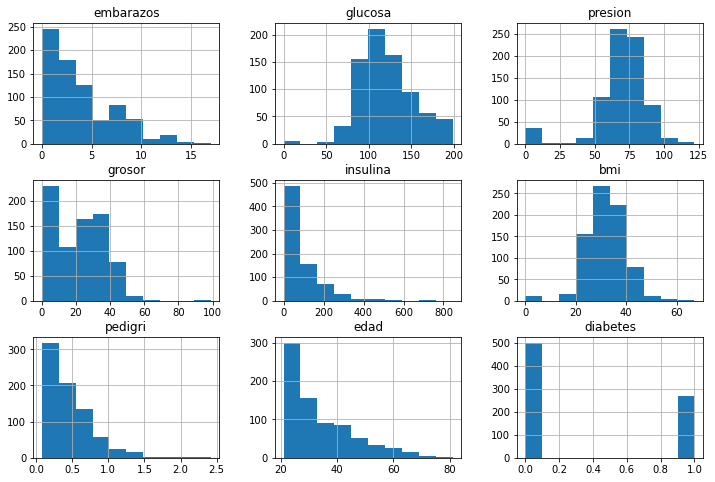

In [8]:
d.hist(figsize = (12,8)) # Construye una cuadrícula de histogramas para cada variable numérica, (figsize para el tamaño)
plt.show()

In [9]:
d.isnull().sum() # Cantidad de elementos faltantes por cada variable

embarazos    0
glucosa      0
presion      0
grosor       0
insulina     0
bmi          0
pedigri      0
edad         0
diabetes     0
dtype: int64

### Preparación de los datos para los algoritmos de aprendizaje

In [10]:
d.corr().diabetes.sort_values()  # Matriz de correlaciones

presion      0.065068
grosor       0.074752
insulina     0.130548
pedigri      0.173844
embarazos    0.221898
edad         0.238356
bmi          0.292695
glucosa      0.466581
diabetes     1.000000
Name: diabetes, dtype: float64

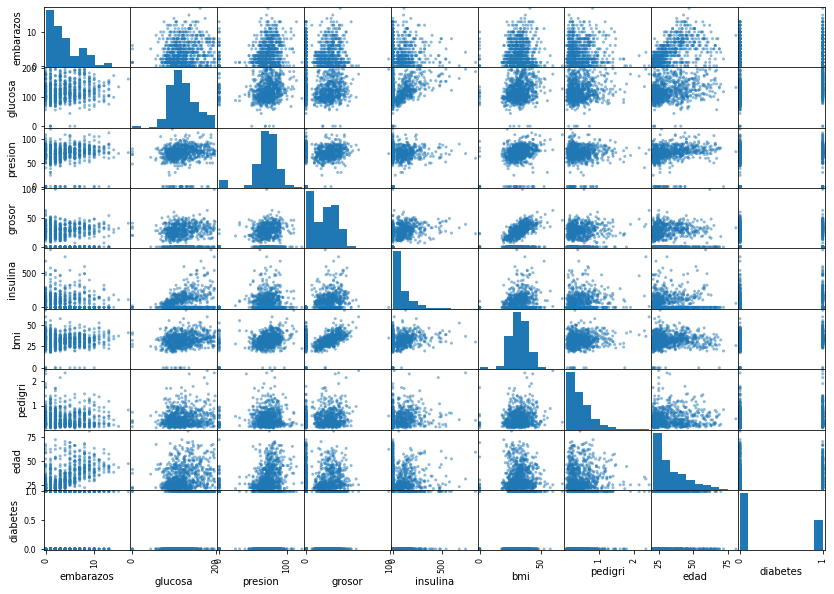

In [11]:
from pandas.plotting import scatter_matrix
atributos_mejor_correlacionados = ['insulina', 'pedigri', 'embarazos', 'edad',\
                                   'bmi', 'glucosa', 'diabetes']
scatter_matrix(d, figsize = (14,10)) # Gráfico conjunto de correlaciones

plt.savefig('scatter_diabetes.jpg')
plt.show()

# División en predictores y etiquetas 

In [12]:
X = d.drop(['diabetes'], axis = 1) # Quitamos la variable respuesta Outcome para que queden únicamente las variables explicativas
y = d.diabetes # Variable respuesta

## División en entrenamiento y testeo

In [13]:
from sklearn.model_selection import train_test_split 

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.1, random_state = 42)

# Escalamiento de los datos 

In [15]:
from sklearn.preprocessing import StandardScaler

In [16]:
escalador = StandardScaler()

In [17]:
X_train_escalado  = escalador.fit_transform(X_train)

### Entrenamiento de modelos de clasificación

In [18]:
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression



# Instanciación de las seis clases

In [19]:
sgd_clf = SGDClassifier()
forest_clf = RandomForestClassifier()
svc_clf = SVC()
knn_clf = KNeighborsClassifier()
lr_clf = LogisticRegression(max_iter = 200)
tree_clf =DecisionTreeClassifier()

# Entrena los seis modelos en el conjunto de entrenamiento

In [20]:
sgd_clf.fit(X_train_escalado, y_train)
forest_clf.fit(X_train_escalado, y_train)
svc_clf.fit(X_train_escalado, y_train)
knn_clf.fit(X_train_escalado, y_train)

lr_clf.fit(X_train_escalado, y_train)

tree_clf.fit(X_train_escalado, y_train)

DecisionTreeClassifier()

## Evaluación del desempeño de los modelos con la matriz de confusión

In [21]:
from sklearn.metrics import confusion_matrix 

In [22]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import  recall_score 

In [23]:
y_train_prediccion_sgd = cross_val_predict(sgd_clf, X_train_escalado, y_train, cv = 5)
y_train_prediccion_forest = cross_val_predict(forest_clf, X_train_escalado, y_train, cv = 5)
y_train_prediccion_svc = cross_val_predict(svc_clf, X_train_escalado, y_train, cv = 5)
y_train_prediccion_knn = cross_val_predict(knn_clf, X_train_escalado, y_train, cv = 5)
y_train_prediccion_lr = cross_val_predict(lr_clf, X_train_escalado, y_train, cv = 5)
y_train_prediccion_tree = cross_val_predict(tree_clf, X_train_escalado, y_train, cv = 5)

In [24]:
confusion_matrix(y_train, y_train_prediccion_sgd)

array([[383,  67],
       [115, 126]], dtype=int64)

In [25]:
confusion_matrix(y_train, y_train_prediccion_forest)

array([[392,  58],
       [103, 138]], dtype=int64)

In [26]:
confusion_matrix(y_train, y_train_prediccion_svc)

array([[394,  56],
       [110, 131]], dtype=int64)

In [27]:
confusion_matrix(y_train, y_train_prediccion_knn)

array([[378,  72],
       [107, 134]], dtype=int64)

In [28]:
confusion_matrix(y_train, y_train_prediccion_lr)

array([[393,  57],
       [105, 136]], dtype=int64)

In [29]:
confusion_matrix(y_train, y_train_prediccion_tree)

array([[363,  87],
       [ 84, 157]], dtype=int64)

In [30]:
from sklearn.metrics import recall_score

In [31]:
recall_score(y_train, y_train_prediccion_sgd)

0.5228215767634855

In [32]:
recall_score(y_train, y_train_prediccion_forest)

0.5726141078838174

In [33]:
recall_score(y_train, y_train_prediccion_svc)

0.5435684647302904

In [34]:
recall_score(y_train, y_train_prediccion_knn)

0.5560165975103735

In [35]:
recall_score(y_train, y_train_prediccion_lr)

0.5643153526970954

In [36]:
recall_score(y_train, y_train_prediccion_tree)

0.6514522821576764

**Conclusión** El mejor modelo hasta ahora es `RandomForestClassifier`, por lo tanto este es el que afinaremos

### Afinación del modelo seleccionado con la cuadrícula de hiperparámetros

In [37]:
from sklearn.model_selection import GridSearchCV 

In [39]:
param_grid_tree = {
    'criterion':['gini', 'entropy'],\
    'splitter':['best', 'random'],\
    'max_depth':[1,3,5,7,10,None],\
    
}

In [42]:
param_grid_forest = {'n_estimators': [1,10] , 'criterion': ['gini', 'entropy'],\
              'max_depth':[5,7,100], 'min_samples_split':[1,2]}

In [46]:
param_grid_sgd = {
    'max_iter':[500, 1000, 1500],\
    'l1_ratio':[0.1,0.15, 0.5, 1],\
    'alpha':[0.0001, 0.001, 0.01, 0.1]
}

In [41]:
%%time 

cuadricula_tree = GridSearchCV(tree_clf, param_grid_tree, \
                          return_train_score = True, scoring = 'recall', cv = 5)

cuadricula_tree.fit(X_train_escalado, y_train)

mejor_modelo_tree = cuadricula_tree.best_estimator_

mejor_modelo_tree.score(X_train_escalado, y_train)

Wall time: 1.08 s


0.9826338639652678

In [44]:
%%time 

cuadricula_forest = GridSearchCV(forest_clf, param_grid_forest, \
                          return_train_score = True, scoring = 'recall', cv = 5)

cuadricula_forest.fit(X_train_escalado, y_train)

print(cuadricula_forest.best_params_) # Mejores hiperparámetros

mejor_modelo_forest = cuadricula_forest.best_estimator_

mejor_modelo_forest.score(X_train_escalado, y_train)

C:\Users\Marco\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Marco\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Marco\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\Marco\anaconda3\lib\site-packages\joblib\parallel.py", line 1043, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\Marco\anaconda3\lib\site-packages\joblib\parallel.py", line 861, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\Marco\anaconda3\lib\site-packages\joblib\parallel.py", line 779, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)

C:\Users\Marco\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Marco\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Marco\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\Marco\anaconda3\lib\site-packages\joblib\parallel.py", line 1043, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\Marco\anaconda3\lib\site-packages\joblib\parallel.py", line 861, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\Marco\anaconda3\lib\site-packages\joblib\parallel.py", line 779, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)

C:\Users\Marco\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Marco\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Marco\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\Marco\anaconda3\lib\site-packages\joblib\parallel.py", line 1043, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\Marco\anaconda3\lib\site-packages\joblib\parallel.py", line 861, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\Marco\anaconda3\lib\site-packages\joblib\parallel.py", line 779, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)

C:\Users\Marco\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Marco\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Marco\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\Marco\anaconda3\lib\site-packages\joblib\parallel.py", line 1043, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\Marco\anaconda3\lib\site-packages\joblib\parallel.py", line 861, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\Marco\anaconda3\lib\site-packages\joblib\parallel.py", line 779, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)

C:\Users\Marco\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Marco\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Marco\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\Marco\anaconda3\lib\site-packages\joblib\parallel.py", line 1043, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\Marco\anaconda3\lib\site-packages\joblib\parallel.py", line 861, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\Marco\anaconda3\lib\site-packages\joblib\parallel.py", line 779, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)

C:\Users\Marco\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Marco\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Marco\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\Marco\anaconda3\lib\site-packages\joblib\parallel.py", line 1043, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\Marco\anaconda3\lib\site-packages\joblib\parallel.py", line 861, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\Marco\anaconda3\lib\site-packages\joblib\parallel.py", line 779, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)

{'criterion': 'gini', 'max_depth': 100, 'min_samples_split': 2, 'n_estimators': 1}
Wall time: 2.21 s


C:\Users\Marco\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:922: UserWarning: One or more of the test scores are non-finite: [       nan        nan 0.53137755 0.57670068        nan        nan
 0.48579932 0.56811224        nan        nan 0.61394558 0.54753401
        nan        nan 0.49710884 0.49778912        nan        nan
 0.55620748 0.55144558        nan        nan 0.53503401 0.52661565]
  warnings.warn(
C:\Users\Marco\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:922: UserWarning: One or more of the train scores are non-finite: [       nan        nan 0.60261766 0.68979383        nan        nan
 0.6337975  0.84026339        nan        nan 0.81431347 0.96265652
        nan        nan 0.57175626 0.69709629        nan        nan
 0.6783193  0.80604491        nan        nan 0.85167314 0.94710708]
  warnings.warn(


0.8871201157742402

**Conclusión** El modelo afinado mejoré de 60% a 65% de recall. 

In [47]:
%%time 

cuadricula_sgd = GridSearchCV(sgd_clf, param_grid_sgd, \
                          return_train_score = True, scoring = 'recall', cv = 5)

cuadricula_sgd.fit(X_train_escalado, y_train)

print(cuadricula_sgd.best_params_)

mejor_modelo_sgd = cuadricula_sgd.best_estimator_



{'alpha': 0.001, 'l1_ratio': 0.15, 'max_iter': 500}
Wall time: 2.25 s


In [48]:
X_test_escalado = escalador.transform(X_test)

# Prueba de desempeño en el conjunto de testeo para forest_clf 

In [50]:
y_test_predicciones_sgd = mejor_modelo_sgd.predict(X_test_escalado)
y_test_predicciones_forest = mejor_modelo_forest.predict(X_test_escalado)
y_test_predicciones_tree = mejor_modelo_tree.predict(X_test_escalado)

In [52]:
print(recall_score(y_test, y_test_predicciones_sgd))
print(recall_score(y_test, y_test_predicciones_forest))
print(recall_score(y_test, y_test_predicciones_tree)) 

0.48148148148148145
0.6296296296296297
0.7407407407407407


**Conclusión** El árbol de decisión tree_clf se comporta con un recall de $74\%$ muy bien en el conjunto de testeo. 

# Prueba de desempeño en el conjunto de testeo para forest_clf 

In [ ]:
y_test_predicciones = mejor_modelo_forest.predict(X_test_escalado)

In [ ]:
y_test_predicciones 

In [ ]:
y_test.sum()  

In [ ]:
recall_score(y_test, y_test_predicciones)

In [ ]:
confusion_matrix(y_test, y_test_predicciones)

In [ ]:
y_test_predicciones_cv = cross_val_predict(mejor_modelo_forest, X_test_escalado, y_test, cv = 5)

In [ ]:
confusion_matrix(y_test, y_test_predicciones_cv)

In [ ]:
recall_score(y_test, y_test_predicciones_cv)

**Conclusión:** 

El desempeño en el conjunto de testeo es muy cercano al desempeño en el conjunto de entrenamiento sin el afinamiento del modelo. 

# Modificación del umbral de desempeño para obtener un recall del 100%

Ver página 142 de Geron

In [ ]:
y_scores = cross_val_predict(mejor_modelo_forest, X_train_escalado, y_train, cv=3,
method="predict_proba")

In [ ]:
from sklearn.metrics import precision_recall_curve
precisions, recalls, thresholds = precision_recall_curve(y_train, y_scores)


## Referentes  

* La clase LogisticRegression de sklearn: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html  

* Lista de medidas de desempaño para regresores y clasificadores: https://scikit-learn.org/stable/modules/model_evaluation.html#scoring

* La clase RandomForestClassifier: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html  

* La clase SGDClassifier: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html